In [0]:
# Package Importing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
np.set_printoptions(threshold=sys.maxsize)
import collections
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
!pip install catboost
import catboost as cbst
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score


In [0]:
# Mounting drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# File I/O
train = pd.read_csv('/content/drive/My Drive/personal_hackathons/DataSet/hdfc/Train.csv')
test = pd.read_csv('/content/drive/My Drive/personal_hackathons/DataSet/hdfc/Test.csv')
X_train = train.loc[:, train.columns != 'Col2']
y_train = train.loc[:, train.columns == 'Col2']
X_test = test.loc[:, test.columns != 'Col2']

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (746,835) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (700,731,740,752,761,789,811,820,829,841,850) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# dataset viewing
X_test.head()
X_train.shape
test.head()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# X_train.isnull().sum()/X_train.shape[0]

,Col1,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Col13,Col14,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24,Col25,Col26,Col27,Col28,Col29,Col30,Col31,Col32,Col33,Col34,Col35,Col36,Col37,Col38,Col39,Col40,Col41,...,Col2358,Col2359,Col2360,Col2361,Col2362,Col2363,Col2364,Col2365,Col2366,Col2367,Col2368,Col2369,Col2370,Col2371,Col2372,Col2373,Col2374,Col2375,Col2376,Col2377,Col2378,Col2379,Col2380,Col2381,Col2382,Col2383,Col2384,Col2385,Col2386,Col2387,Col2388,Col2389,Col2390,Col2391,Col2392,Col2393,Col2394,Col2395,Col2396,Col2397
0,RIGD58ZWD,8.167140e+04,8.614542e+04,7.532296e+04,7.532296e+04,1.125174e+05,1.002778e+05,2.038915e+04,3.053853e+04,8.395911e+04,8.138800e+04,11.310459,11.630863,11.515700,11.229540,1.143681,0.879545,NaN,NaN,0.236683,0.746188,0.405435,0.811625,0.086109,0.238817,0.150242,NaN,3,3,6,6,6,0,1,5,19.0,NaN,NaN,39.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,44.0,44.0,23.0,41.0,41.0,36.0
1,RIH660YDS,-1.362824e+07,-4.493043e+06,-3.777257e+06,-4.493043e+06,-4.749764e+06,-4.749764e+06,1.147556e+07,1.147556e+07,1.272055e+07,1.272055e+07,NaN,NaN,NaN,NaN,NaN,-2.935756,-232.140528,-94.995287,NaN,NaN,NaN,NaN,-0.483522,-0.308259,-0.742190,NaN,6,5,7,19,9,0,2,6,2.0,0.0,NaN,5.0,4.0,...,0,0,1,0,0,0,2,2,1,1,0,0,1,2,1,1,2,1,1,1,2,1,3,1,2,1,0,0,1,1,1,1,2,2,1234.0,1234.0,680.0,154.0,153.0,86.0
2,RIH660Q96,1.302700e+06,1.341449e+06,1.240085e+06,1.341449e+06,1.477503e+06,1.477503e+06,3.904086e+05,3.904086e+05,4.979106e+05,4.979106e+05,14.079949,14.205864,14.205864,14.109261,1.081739,0.943850,2.122872,0.857057,0.291035,0.336995,0.291035,0.336995,-0.108229,-0.095389,-0.053413,NaN,2,2,2,3,1,0,1,6,NaN,NaN,NaN,NaN,5.0,...,0,0,0,0,0,0,0,0,1,0,2,1,0,1,0,0,0,0,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,33.0,24.0,19.0,3.0,1.0,1.0
3,RIYDO15W1,1.932258e+05,1.454433e+05,1.929148e+05,1.454433e+05,1.318250e+04,1.318250e+04,8.650108e+04,8.650108e+04,5.896693e+03,5.896693e+03,12.171615,9.486645,9.486645,11.887541,0.753925,1.978542,NaN,NaN,0.594741,0.447312,0.594741,0.447312,0.441902,0.383241,0.681768,NaN,4,4,5,5,5,0,1,6,6.0,5.0,NaN,1.0,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,8.0,3.0,7.0,7.0,3.0
4,RIYBGC1ZD,3.913385e+05,1.987337e+05,1.703432e+05,1.987337e+05,3.046536e+05,3.046536e+05,2.528307e+05,2.528307e+05,3.034449e+05,3.034449e+05,12.877328,12.626931,12.626931,12.199721,1.166667,63.849949,NaN,NaN,1.272208,0.996032,1.272208,0.996032,0.507021,0.539030,0.742665,NaN,1,1,1,1,1,0,1,6,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.0,7.0,7.0,6.0,6.0,5.0


In [0]:
#null value check
null_threshold = 0.40
missingcol = X_train.columns[(X_train.isnull().sum()/X_train.shape[0])>null_threshold]
# for col in missingcol:
#     print(col,X_train[col].isnull().sum()/X_train.shape[0])

In [0]:
# null value dropping
X_train = X_train.drop(missingcol,axis=1)
X_test = X_test.drop(missingcol,axis=1)

In [0]:
# X_train.columns[0:21]
# Dropping ID
num_train = X_train.loc[:, X_train.columns != 'Col1']
num_test = X_test.loc[:, X_test.columns != 'Col1']

In [0]:
# What are the columns where imputation is required?
cols = num_train.columns[(num_train.isnull().sum()/num_train.shape[0])>0]
num_train_cols = num_train[cols]
num_test_cols = num_test[cols]
num_train = num_train.drop(cols,axis=1)
num_test = num_test.drop(cols,axis=1)

In [0]:
# mean_imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_test = num_train_cols.append(num_test_cols)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_constant = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value = 0)
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [0]:
imp_mean = imp_mean.fit(train_test)
num_train_mean_tr = pd.DataFrame(imp_mean.transform(num_train_cols),columns=[str(col) + '_me' for col in num_train_cols.columns])
num_test_mean_tr = pd.DataFrame(imp_mean.transform(num_test_cols),columns=[str(col) + '_me' for col in num_test_cols.columns])
# num_test_mean_tr.columns = [str(col) + '_me' for col in num_test_mean_tr.columns]
# num_train_mean_tr.head()

# df.columns = [str(col) + '_x' for col in df.columns]


# imp_median = imp_median.fit(num_train)
# num_train_mean_tr = imp_mean.transform(num_train)

# imp_constant = imp_constant.fit(num_train)
# imp_mode = imp_mode.fit(num_train)
# mean_imputer = mean_imputer.fit(num_train)

In [0]:
# imp_median = imp_median.fit(train_test)
# num_train_median_tr = pd.DataFrame(imp_median.transform(num_train_cols),columns=[str(col) + '_med' for col in num_train_cols.columns])
# num_test_median_tr = pd.DataFrame(imp_median.transform(num_test_cols),columns=[str(col) + '_med' for col in num_train_cols.columns])


In [0]:
# imp_constant = imp_constant.fit(train_test)
# num_train_constant_tr = pd.DataFrame(imp_constant.transform(num_train_cols),columns=[str(col) + '_ze' for col in num_train_cols.columns])
# num_test_constant_tr = pd.DataFrame(imp_constant.transform(num_test_cols),columns=[str(col) + '_ze' for col in num_train_cols.columns])


In [0]:
# imp_mode = imp_mode.fit(train_test)
# num_train_mode_tr = pd.DataFrame(imp_mode.transform(num_train_cols),columns=[str(col) + '_mo' for col in num_train_cols.columns])
# num_test_mode_tr = pd.DataFrame(imp_mode.transform(num_test_cols),columns=[str(col) + '_mo' for col in num_train_cols.columns])


In [0]:
# all_train_imputs = pd.concat([num_train_mean_tr, num_train_median_tr, num_train_constant_tr, num_train_mode_tr], axis=1)
# all_train_imputs = pd.concat([num_test_mean_tr, num_test_median_tr, num_test_constant_tr, num_test_mode_tr], axis=1)

all_train_imputs = pd.concat([num_train_mean_tr], axis=1)
all_train_imputs = pd.concat([num_test_mean_tr], axis=1)

In [0]:
# for col in cols:
    # print(col,num_train[col].isnull().sum()/num_train.shape[0],num_train[col].dtype)

In [0]:
print(len(cols), len(num_train_constant_tr.columns))

NameError: ignored

In [0]:
num_train = pd.concat([num_train, num_train_mean_tr], axis=1)
num_test = pd.concat([num_test, num_test_mean_tr], axis=1)

In [0]:
num_train.shape, num_test.shape

((17521, 2165), (20442, 2165))

In [0]:
# num_test = pd.DataFrame(mean_imputer.transform(num_test),columns=num_train.columns)

In [0]:
# num_train.head()

In [0]:
# num_test.head()

In [0]:
# train[num_train.columns] = num_train

In [0]:
num_train.isnull().sum().sum(), num_test.isnull().sum().sum()

(0, 0)

In [0]:
## Dropping correlated features
# Create correlation matrix
corr_matrix = num_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
# to_drop

In [0]:
# Drop features 
num_train = num_train.drop(num_train[to_drop], axis=1)
num_test = num_test.drop(num_test[to_drop], axis=1)

In [0]:
num_train.shape

(17521, 156)

In [0]:
preds = np.zeros((len(num_test), 1))
for i in range(17):
    print("training LGBC model {}".format(i))
    lgbc = lgb.LGBMClassifier(n_estimators=900, max_depth=7, learning_rate=0.01, random_state=i, colsample_bytree=0.1, reg_lambda=15, reg_alpha=10)
    lgbc.fit(num_train, y_train)
    preds = preds + lgbc.predict_proba(num_test)[:,1].reshape(-1, 1)
preds = preds/17

training LGBC model 0


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training LGBC model 1
training LGBC model 2
training LGBC model 3
training LGBC model 4
training LGBC model 5
training LGBC model 6
training LGBC model 7
training LGBC model 8
training LGBC model 9
training LGBC model 10
training LGBC model 11
training LGBC model 12
training LGBC model 13
training LGBC model 14
training LGBC model 15
training LGBC model 16


In [0]:
# y_pred_lgb = 1 if preds[,1] > 0.5 else 0
# y_pred_lgb
list(preds.reshape)

[array([0.05869965]),
 array([0.17596163]),
 array([0.03246308]),
 array([0.06813191]),
 array([0.03257001]),
 array([0.1658504]),
 array([0.04168166]),
 array([0.08557279]),
 array([0.08828615]),
 array([0.08201911]),
 array([0.0876819]),
 array([0.07497798]),
 array([0.06769629]),
 array([0.04116287]),
 array([0.05837986]),
 array([0.07260609]),
 array([0.08573559]),
 array([0.36610886]),
 array([0.02247189]),
 array([0.03763605]),
 array([0.09720982]),
 array([0.05160801]),
 array([0.07658958]),
 array([0.03223316]),
 array([0.0495412]),
 array([0.08256415]),
 array([0.02726857]),
 array([0.04498448]),
 array([0.05802713]),
 array([0.03002945]),
 array([0.07452714]),
 array([0.06843883]),
 array([0.02787222]),
 array([0.13896621]),
 array([0.10074399]),
 array([0.06605184]),
 array([0.09886071]),
 array([0.03408421]),
 array([0.05533156]),
 array([0.05143733]),
 array([0.19345029]),
 array([0.03256358]),
 array([0.31071652]),
 array([0.02704592]),
 array([0.11820033]),
 array([0.051

In [0]:
# clf_rf.fit(num_train,y_train)
# clf_lr.fit(num_train,y_train)
# clf_svm.fit(num_train,y_train)
# eclf.fit(num_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:7

EnsembleVoteClassifier(clfs=[RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=20,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
                                                    oob_score

In [0]:
# np.sort(clf.feature_importances_)

array([2.44493359e-05, 2.82379817e-05, 4.53351647e-05, 6.51531896e-05,
       8.08756684e-05, 8.85437485e-05, 9.80880760e-05, 1.00447537e-04,
       1.05164721e-04, 1.05282092e-04, 1.17819886e-04, 1.21906571e-04,
       1.57112877e-04, 1.60098114e-04, 1.66376138e-04, 1.68934401e-04,
       1.70126295e-04, 1.70255691e-04, 1.79791676e-04, 1.81467863e-04,
       1.89494502e-04, 2.02011659e-04, 2.11299363e-04, 2.14886256e-04,
       2.19802619e-04, 2.26319435e-04, 2.29399073e-04, 2.30466652e-04,
       2.31988999e-04, 2.33754507e-04, 2.37297386e-04, 2.39981144e-04,
       2.43614373e-04, 2.44784529e-04, 2.44986811e-04, 2.45129290e-04,
       2.46136559e-04, 2.48155949e-04, 2.55961930e-04, 2.63738165e-04,
       2.63775952e-04, 2.65116267e-04, 2.68870940e-04, 2.75471743e-04,
       2.78352065e-04, 2.78782044e-04, 2.87002938e-04, 2.92668900e-04,
       2.94990063e-04, 2.99808748e-04, 3.00105128e-04, 3.00191938e-04,
       3.00309590e-04, 3.01980473e-04, 3.03435855e-04, 3.04450102e-04,
      

In [0]:
# y_pred_rf = clf_rf.predict(num_train)
# y_pred_lr = clf_lr.predict(num_train)
# y_pred_svm = clf_svm.predict(num_train)
# y_pred_eclf = eclf.predict(num_train)
y_pred_xgb = model.predict(num_train)

In [0]:
print(collections.Counter(y_pred_rf))
print(collections.Counter(y_pred_lr))
print(collections.Counter(y_pred_svm))
print(collections.Counter(y_pred_eclf))
print(collections.Counter(preds>)

Counter({0: 16368, 1: 1153})
Counter({0: 17511, 1: 10})
Counter({0: 15901, 1: 1620})
Counter({0: 17453, 1: 68})


In [0]:
print(collections.Counter(y_pred_xgb))

Counter({0: 17333, 1: 188})


In [0]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred_xgb)

0.1672652642380708

In [0]:
test = test.drop(missingcol,axis=1)

In [0]:
num_train.to_csv('/content/drive/My Drive/personal_hackathons/DataSet/hdfc/Imputed_Train_Mode_first_cut.csv')

In [0]:
len(num_train.columns)

2032

In [0]:
y_pred_test = clf_svm.predict(num_test)
collections.Counter(y_pred_test)
sub_list = {'Col1': test['Col1'], 'Col2': y_pred_test}
submission_df = pd.DataFrame(sub_list)
submission_df.to_csv('/content/drive/My Drive/personal_hackathons/DataSet/hdfc/submission_4_i.csv',index=False)

In [0]:
sub = pd.DataFrame()
sub_list = {'Col1':X_test['Col1']}
submission_df = pd.DataFrame(sub_list)
# sub['score'] = preds[1,1]
submission_df.head()
submission_df['is_click_x'] = preds
submission_df['Col2'] = 0
submission_df.loc[submission_df['is_click_x']>0.28945,'Col2'] = 1 
submission_df[['Col1','Col2']].to_csv('/content/drive/My Drive/personal_hackathons/DataSet/hdfc/submission_22_i.csv',index=False)
# sub['decision'] =/
# 1 if preds.reshape((len(preds),1)) > 0.5 else 0


In [0]:
corr = num_train.corr()

submission 1: base, 100, 15
submission 2: all impute, 200, 20
submission 3: only mean, 500, 20


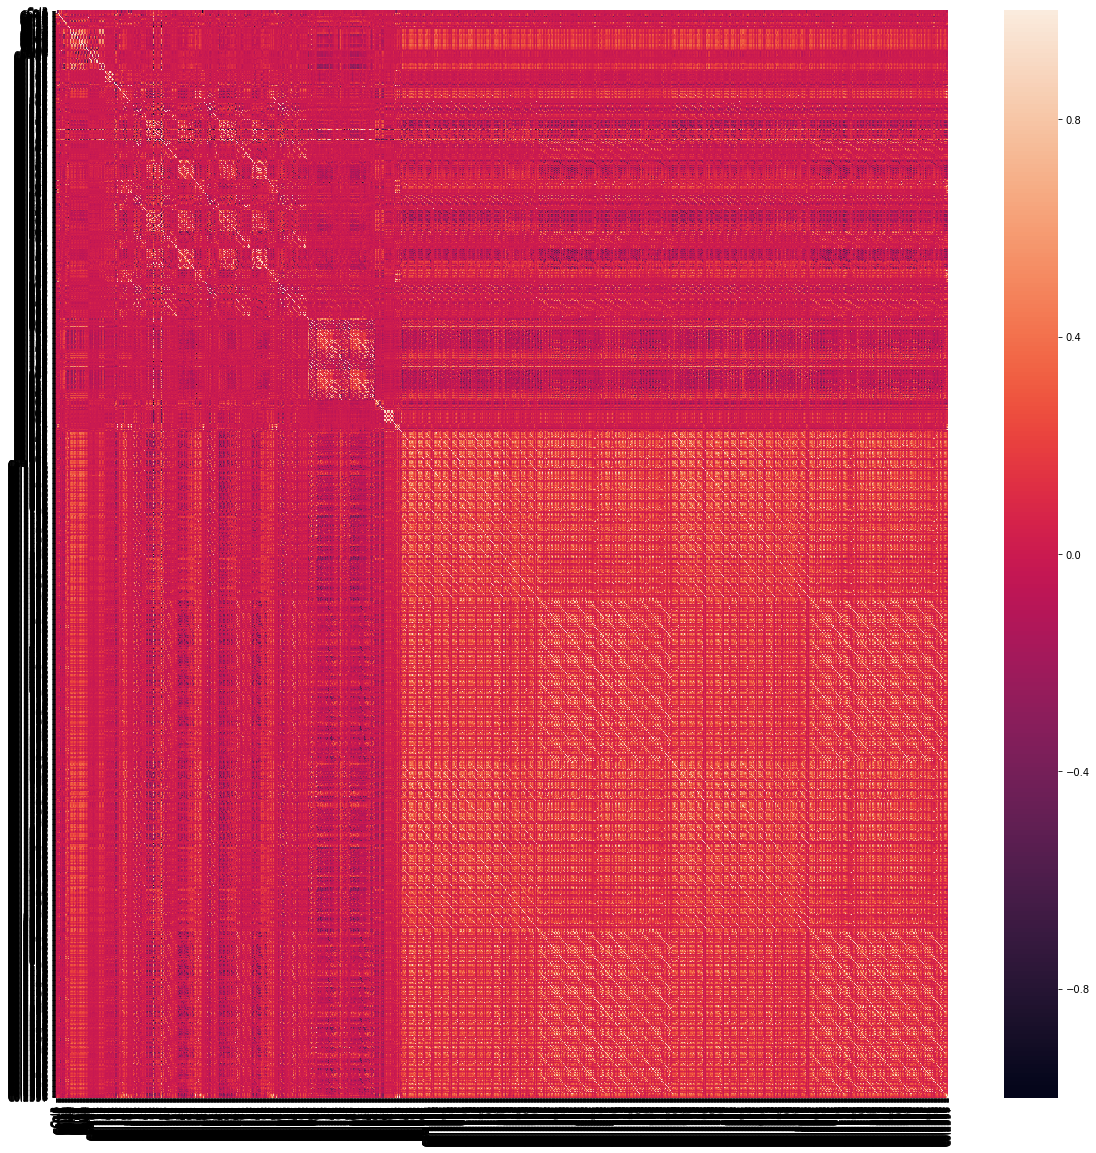

In [0]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, ax=ax)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

In [0]:
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

In [0]:
to_drop_low = []
to_drop_up = []
for column in upper.columns:
  for row in upper.columns:
      if (upper[row][column] < -0.6 and upper[row][column]!=1):
        to_drop_low.append([row,column,upper[row][column]])
      elif (upper[row][column] > 0.6 and upper[row][column]!=1):
        to_drop_up.append([row,column,upper[row][column]])   

In [0]:
to_drop_low[0:10]

[['Col10', 'Col3', -0.7019775155229591],
 ['Col201', 'Col3', -0.9060743856117986],
 ['Col398', 'Col3', -0.9080343679292541],
 ['Col594', 'Col3', -0.8084463634501373],
 ['Col10', 'Col4', -0.7107752160178797],
 ['Col201', 'Col4', -0.9423597057356601],
 ['Col398', 'Col4', -0.9431261092196116],
 ['Col594', 'Col4', -0.7975436229276667],
 ['Col10', 'Col5', -0.6108451089364089],
 ['Col201', 'Col5', -0.9006431601952672]]

In [0]:
len(to_drop_up)

68971

In [0]:
to_drop_low[0:10]

[['Col10', 'Col3', -0.7019775155229591],
 ['Col201', 'Col3', -0.9060743856117986],
 ['Col398', 'Col3', -0.9080343679292541],
 ['Col594', 'Col3', -0.8084463634501373],
 ['Col10', 'Col4', -0.7107752160178797],
 ['Col201', 'Col4', -0.9423597057356601],
 ['Col398', 'Col4', -0.9431261092196116],
 ['Col594', 'Col4', -0.7975436229276667],
 ['Col10', 'Col5', -0.6108451089364089],
 ['Col201', 'Col5', -0.9006431601952672]]

In [0]:
result2 = set(x for l in to_drop_up for x in l)

In [0]:
1997-1887

110

In [0]:
len(result2)

59831